In [54]:
# HOG + KMEANS - PREDICTION

In [99]:
import matplotlib.pyplot as plt
import cv2
from skimage.feature import hog
from skimage import data, exposure
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns
sns.set()
from imutils import build_montages
from sklearn import metrics 
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [67]:
column_names = []
for i in range(160):
    column_names.append(str(i+1))
dog = pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/dog.csv", names=column_names[:80])
cat = pd.read_csv("https://raw.githubusercontent.com/bioramble/pca/master/cat.csv", names=column_names[80:])
pet = pd.concat([dog, cat], axis=1)

cat = cat.transpose()
cat = np.array(cat)
print(cat.shape, len(cat))
dog = dog.transpose()
dog = np.array(dog)
print(dog.shape, len(dog))
pet = pet.transpose()
pet = np.array(pet)
print(pet.shape, len(pet))

(80, 4096) 80
(80, 4096) 80
(160, 4096) 160


In [68]:
#hog list of all animals - testing images
hog_list = []
# list_continue = []
for i in range(160):
#     if 60<i<81:
#         list_continue.append(i)
#         continue
#     elif 139<i<160:
#         list_continue.append(i)
#         continue
    image = pet[i].reshape(64,64).transpose()
    fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True, multichannel=False)
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    hog_list.append(hog_image_rescaled)
hog_list = np.array(hog_list)

In [69]:
print(hog_list.shape)
# print(list_continue)

(160, 64, 64)


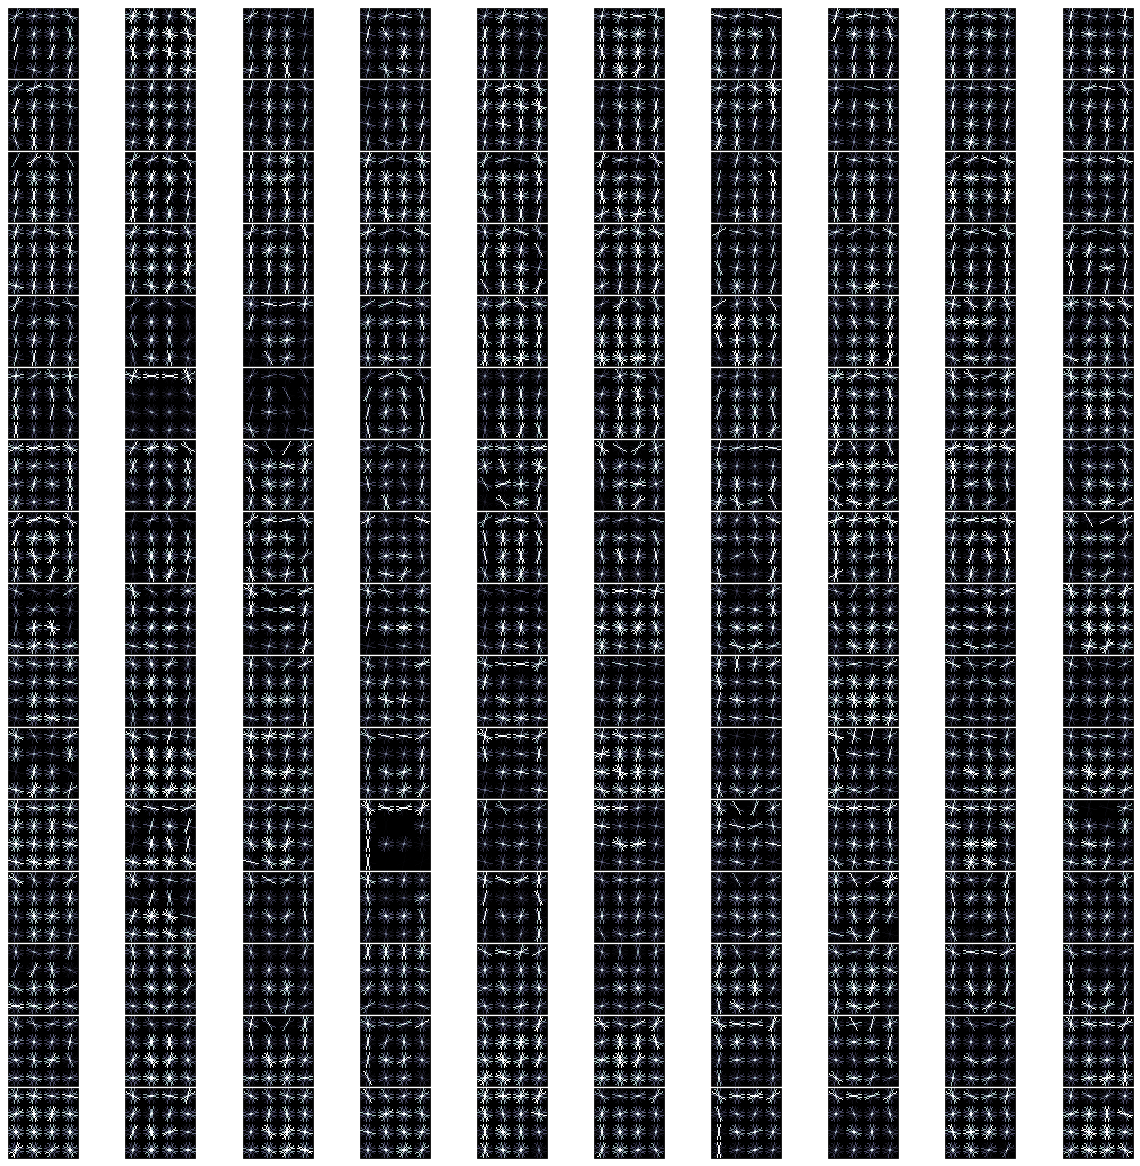

In [71]:
#Setup a figure 6 inches by 6 inches 
fig = plt.figure(figsize=(16,16)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.0) 
# plot the faces, each image is 64 by 64 pixels 
for i in range(160):
    ax = fig.add_subplot(16, 10, i+1, xticks=[], yticks=[]) 
    ax.imshow(hog_list[i].reshape(64,64), cmap=plt.cm.bone, interpolation='nearest') 
plt.show()

In [73]:
kmeans_list = hog_list.flatten().reshape(160,4096)

In [74]:
kmeans = KMeans(n_clusters=2, random_state=0)
clusters = kmeans.fit(kmeans_list)
kmeans.cluster_centers_.shape

(2, 4096)

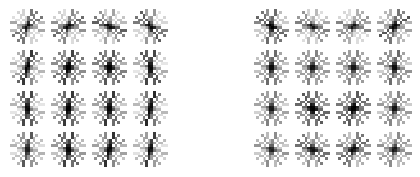

In [75]:
fig, ax = plt.subplots(1, 2, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(2,64,64)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

In [76]:
predictions = []
for i in range(160):
    predictions.append(kmeans.predict(hog_feature(pet[i]).reshape(1,4096)))

classes = []
for i in range(len(predictions)):
    classes.append(predictions[i][0])

In [126]:
print("Predicted: ",classes)
actual = []
for i in range(160):
    if i < 80:
        actual.append(0)
    else:
        actual.append(1)
print("Actual:    ",actual)

Predicted:  [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Actual:     [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


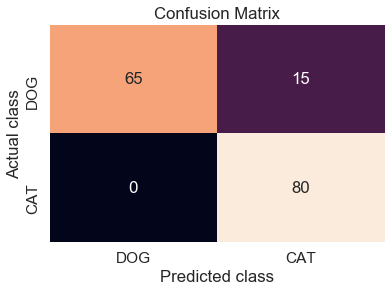

In [129]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(actual, classes)
sns.set(font_scale=1.4) # for label size
sns.heatmap(matrix,annot=True,cbar=False,xticklabels=['DOG','CAT'], yticklabels=['DOG','CAT'])
plt.ylabel('Actual class')
plt.xlabel('Predicted class')
plt.title('Confusion Matrix')
plt.show()

In [80]:
score = (matrix[0][0] + matrix[1][1])/sum(matrix.flatten())
print("Accuracy: "+str(score))

Accuracy: 0.90625


In [81]:
def predict(image):
    fig = plt.figure(figsize=(2,2))
    plt.axis('off')
    hog = hog_feature(image)
    pred = kmeans.predict(hog.reshape(1,4096))
    if pred == 1:
        plt.title("CAT")
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.0)
        plt.imshow(image.reshape(64,64).transpose(), cmap=plt.cm.bone, interpolation='nearest')
    else:
        plt.title("DOG")
        fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.0)
        plt.imshow(image.reshape(64,64).transpose(), cmap=plt.cm.bone, interpolation='nearest')

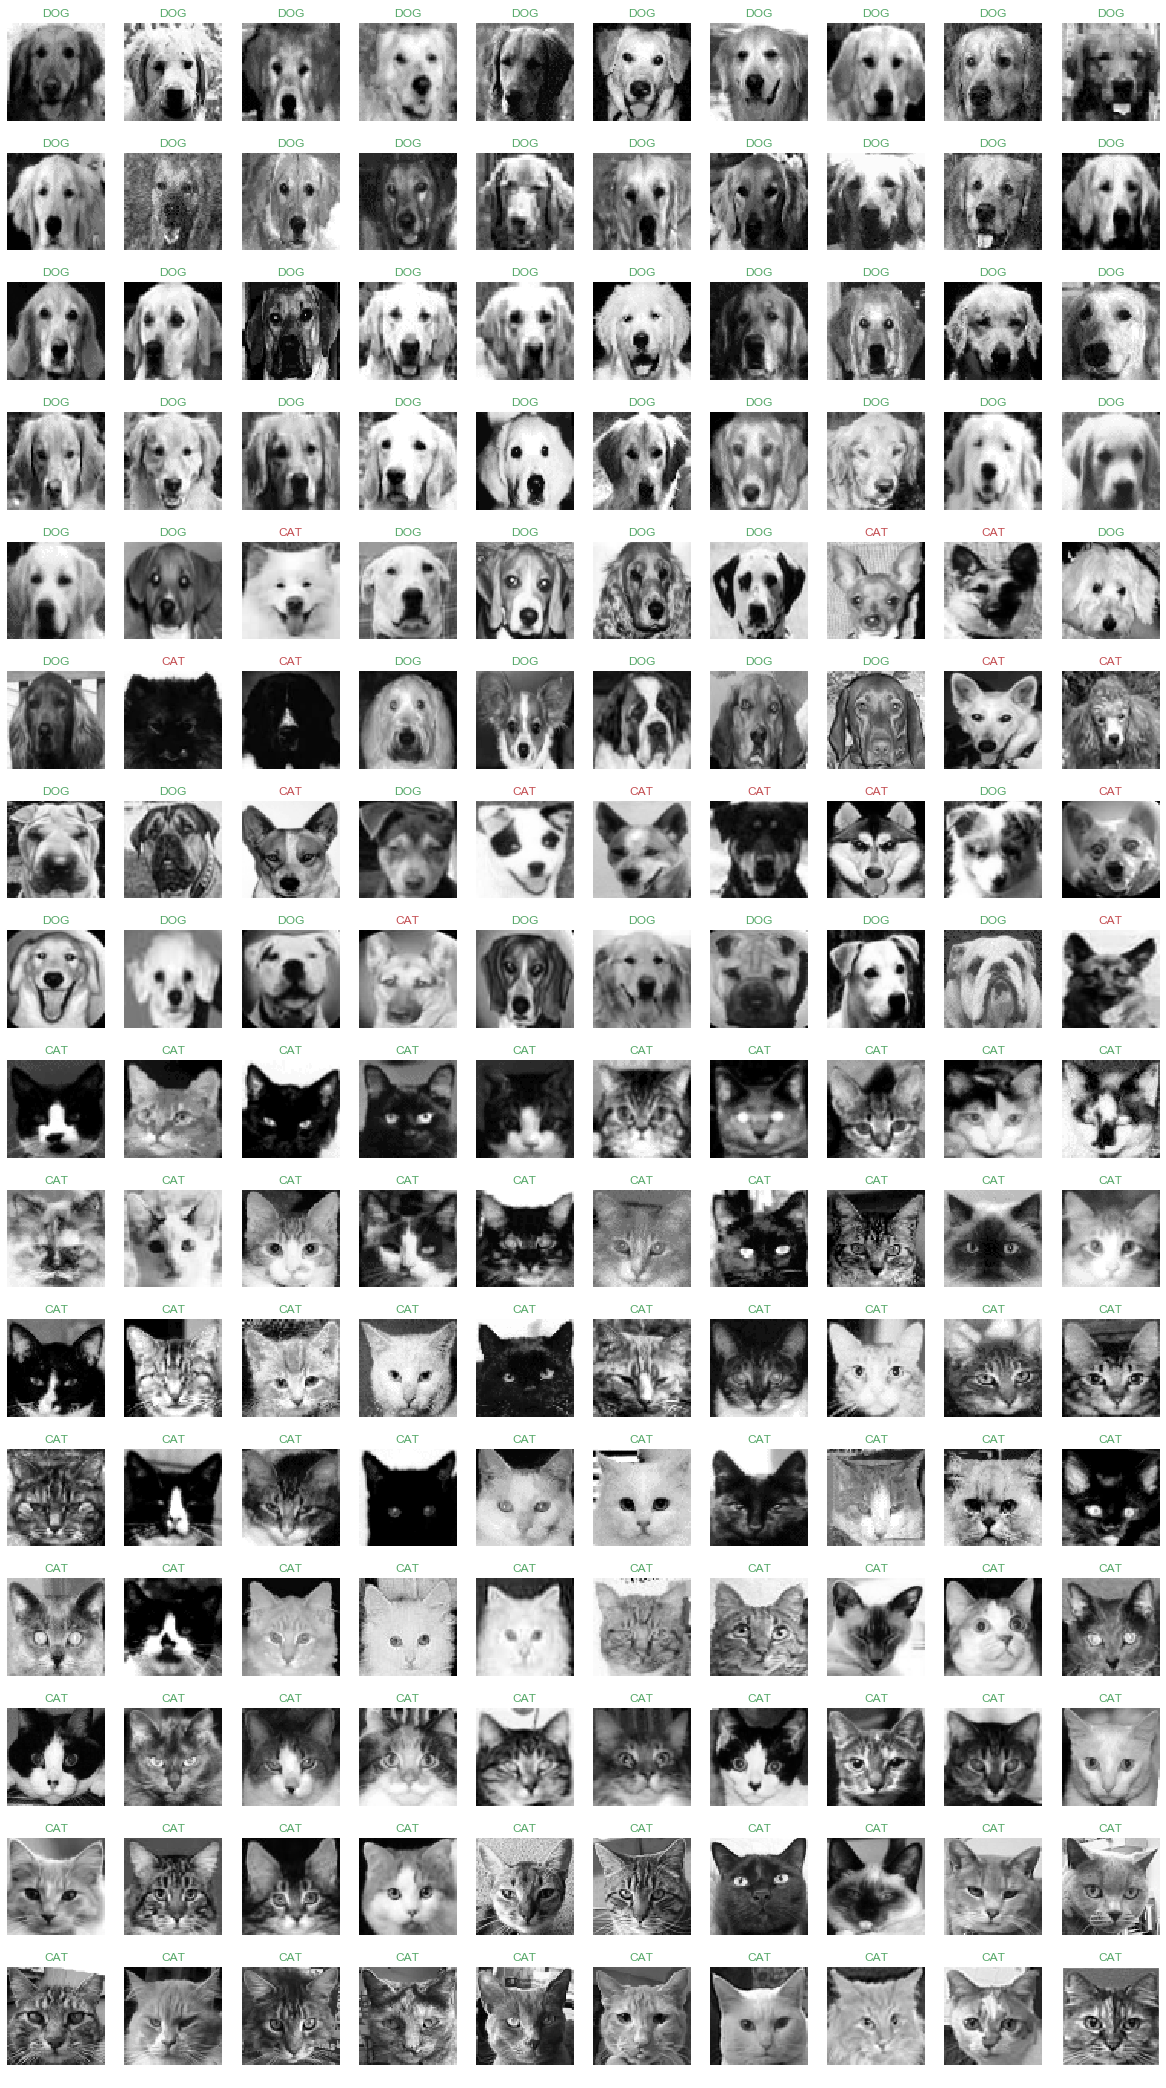

In [85]:
fig = plt.figure(figsize=(16,16)) 
fig.subplots_adjust(left=0, right=1, bottom=0, top=1.8, hspace=0.0) 
contor = 0
for i in range(160):
    plt.axis('off')
    ax = fig.add_subplot(16, 10, contor+1, xticks=[], yticks=[])
    contor=contor+1
#         hog = hog_feature(pet[i])
#         pred = kmeans.predict(hog.reshape(1,4096))
#     pred = kmeans.predict(hog_feature(pet[i]).reshape(1,4096))
    if ((classes[i]==0) and (actual[i]==0)):
        #predicted dog and actual dog
        title_obj1 = plt.title('DOG')
        plt.getp(title_obj1, 'text')
        plt.setp(title_obj1, color='g')
    elif ((classes[i]==0) and (actual[i]==1)):
        #predicted dog and actual cat
        title_obj1 = plt.title('CAT')
        plt.getp(title_obj1, 'text')
        plt.setp(title_obj1, color='r')
    if ((classes[i]==1) and (actual[i]==0)):
        #predicted cat and actual dog
        title_obj1 = plt.title('CAT')
        plt.getp(title_obj1, 'text')
        plt.setp(title_obj1, color='r')
    elif ((classes[i]==1) and (actual[i]==1)):
        #predicted cat and actual cat
        title_obj1 = plt.title('CAT')
        plt.getp(title_obj1, 'text')
        plt.setp(title_obj1, color='g')
    plt.imshow(pet[i].reshape(64,64).transpose(), cmap="gray")

In [94]:
sclist = []
for i in range(160):
    sclist.append(hog_feature(pet[i]).reshape(1,4096))
sclist = np.reshape(sclist,(160,4096))

In [97]:
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(sclist, classes))

Silhouette Coefficient: 0.126


In [98]:
print(kmeans.inertia_)

10469.79802526113


In [116]:
def calculate_bc(points, assignments):
    nr_clustere=max(assignments)+1
#     print(nr_clustere)
    wc=0
    for k in range(nr_clustere):
        pointsincluster=points[assignments==k]
        points2=points[assignments!=k]
    
        for p in pointsincluster:
            wc+=np.sum((np.sqrt(np.sum((points2-p)**2,axis=1))))
    wc=wc/2
    return wc
        

print(calculate_bc(kmeans_list, kmeans.labels_))

80328.49337422465


In [118]:
def calculate_wc(points, assignments):
    nr_clustere=max(assignments)+1
#     print(nr_clustere)
    wc=0
    for k in range(nr_clustere):
        pointsincluster=points[assignments==k]
   
        for point in pointsincluster:
            wc+=np.sum((np.sqrt(np.sum((pointsincluster-point)**2,axis=1))))
    wc=wc/2
    return wc

print(calculate_wc(kmeans_list, kmeans.labels_))

74855.61452215844


In [106]:
COLORS = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan', 'tab:gray']
MARKERS = ['o', 'v', 's', '<', '>', '8', '^', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X']

def plot2d(X, y_pred, y_true, mode=None, centroids=None):
    transformer = None
    X_r = X
    
    if mode is not None:
        transformer = mode(n_components=2)
        X_r = transformer.fit_transform(X)

    assert X_r.shape[1] == 2, 'plot2d only works with 2-dimensional data'


    plt.grid()
    for ix, iyp, iyt in zip(X_r, y_pred, y_true):
        plt.plot(ix[0], ix[1], 
                    c=COLORS[iyp%len(COLORS)], 
                    marker=MARKERS[iyt%len(MARKERS)])
        
    if centroids is not None:
        C_r = centroids
        if transformer is not None:
            C_r = transformer.fit_transform(centroids)
        for cx in C_r:
            plt.plot(cx[0], cx[1], 
                        marker=MARKERS[-1], 
                        markersize=10,
                        c='red')

    plt.show()

def plot3d(X, y_pred, y_true, mode=None, centroids=None):
    transformer = None
    X_r = X
    if mode is not None:
        transformer = mode(n_components=3)
        X_r = transformer.fit_transform(X)

    assert X_r.shape[1] == 3, 'plot2d only works with 3-dimensional data'

    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.elev = 30
    ax.azim = 120

    for ix, iyp, iyt in zip(X_r, y_pred, y_true):
        ax.plot(xs=[ix[0]], ys=[ix[1]], zs=[ix[2]], zdir='z',
                    c=COLORS[iyp%len(COLORS)], 
                    marker=MARKERS[iyt%len(MARKERS)])
        
    if centroids is not None:
        C_r = centroids
        if transformer is not None:
            C_r = transformer.fit_transform(centroids)
        for cx in C_r:
            ax.plot(xs=[cx[0]], ys=[cx[1]], zs=[cx[2]], zdir='z',
                        marker=MARKERS[-1], 
                        markersize=10,
                        c='red')
    plt.show()

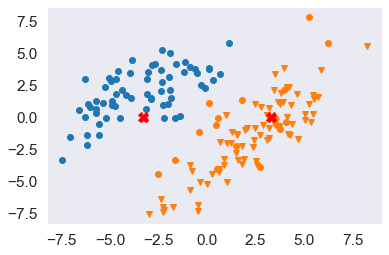

In [130]:
plot2d(kmeans_list, kmeans.labels_, actual, mode=PCA, centroids=kmeans.cluster_centers_)